<!--NAVIGATION-->
< [4.3 Systems of Linear Equations](Tien_chapter14.03-Systems-of-Linear-Equations.ipynb)  | [Contents](Tien_chapter14.04-Solutions-to-Systems-of-Linear-Equations.ipynb) | [4.5 Solve Systems of Linear Equations in Python](Tien_chapter14.05-Solve-Systems-of-Linear-Equations-in-Python.ipynb) >

## **Lecture 4. Linear Algebra and Systems of Linear Equations:** 
### **4.4 Solutions to Systems of Linear Equations**

$$ 
\LARGE Ax=y 
$$ 

* $A$ is an $m \times n$ matrix with $rank(A) = r$

* **solution** is an $x \in {\mathbb{R}}^n$ 

* **measurement** $y \in {\mathbb{R}}^m$, three possible solutions for $x$. 

#### <font color="cyan">**4.4.2 Numerical Algorithms for $Ax = y.$**</font> 

If we avoid the avialble modules from library `np.linalg.inv(A)` to solve Ax = y, 

in the rest of the chapter, we will discuss some of the common <font color="cyan"> numerical methods</font> that you often come across in practical work. 

<font color="cyan">**I. Gauss Elimination Method (Direct method)**</font>

The **Gauss Elimination** method is a procedure to turn matrix $A$ into an **upper triangular** form to solve the system of equations. Let's use a system of 4 equations and 4 variables as example: 

$$\begin{bmatrix}
a_{1,1} & a_{1,2} & a_{1,3} & a_{1,4}\\
0 & a_{2,2}' & a_{2,3}' & a_{2,4}'\\
0 & 0 & a_{3,3}' & a_{3,4}' \\
0 & 0 & 0 & a_{4,4}'
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} y_1 \\y_2' \\ y_3' \\y_4' \end{array}\right]$$

Thus,

\begin{aligned}
\begin{array}{}
 a_{1,1} x_1 &+& a_{1,2} x_2 & + & a_{1,3} x_{3} &+&a_{1,4} x_4 &=& y_1,\\
& & a_{2,2}' x_{2} &+ & a_{2,3}' x_{3} &+& a_{2,4}' x_4 &=& y_{2}' \\
&& & & a_{3,3}' x_{3} &+& a_{3,4}' x_4 &=& y_{3}',\\
&& && && a_{4,4}' x_4 &=& y_{4}'.
\end{array}
\end{aligned}

$$ 
\LARGE Ax = y \rightarrow Ux = y' 
$$ 

We solve the system of equations from bottom-up, this is called **backward substitution**. 

Note that, if $A$ is a lower triangular matrix, we would solve the system from top-down by **forward substitution**.

<font color="magenta">**TRY IT!**</font> Use Gauss Elimination to solve the following equations.

\begin{aligned}
4x_1 + 3x_2 - 5x_3 &=& 2 \\
-2x_1 - 4x_2 + 5x_3 &=& 5 \\
8x_1 + 8x_2  &=& -3 \\
\end{aligned}

**Step 1:** Turn these equations to matrix form $Ax=y$. 

$$
\begin{bmatrix}
4 & 3 & -5\\
-2 & -4 & 5\\
8 & 8 & 0\\
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\x_3 \end{array}\right] =
\left[\begin{array}{c} 2 \\5 \\-3\end{array}\right]$$

**Step 2:** Get the augmented matrix [A, y] 

$$
[A, y]  = \begin{bmatrix}
4 & 3 & -5 & 2\\
-2 & -4 & 5 & 5\\
8 & 8 & 0 & -3\\
\end{bmatrix}$$

**Step 3:** We choose a **pivot equation**. To do this, we can multiply -0.5 for the 1st row (pivot equation) and subtract it from the 2nd row. 

The multiplier is $m_{2,1}=-0.5$. We will get

$$
\begin{bmatrix}
4 & 3 & -5 & 2\\
0 & -2.5 & 2.5 & 6\\
8 & 8 & 0 & -3\\
\end{bmatrix}$$

**Step 4:** The multiplier is $m_{3,1}=2$. We will get

$$
\begin{bmatrix}
4 & 3 & -5 & 2\\
0 & -2.5 & 2.5 & 6\\
0 & 2 & 10 & -7\\
\end{bmatrix}$$

**Step 5:** The multiplier is $m_{3,2}=-0.8$. We will get

$$
\begin{bmatrix}
4 & 3 & -5 & 2\\
0 & -2.5 & 2.5 & 6\\
0 & 0 & 12 & -2.2\\
\end{bmatrix}$$

&nbsp;

**Step 6:** Backward substitution, we can get $x_3=-2.2/12=-0.183$. 

**Step 7:** Insert $x_3$ to the 2nd equation, we get $x_2=-2.583$

**Step 8:** Insert $x_2$ and $x_3$ to the first equation, we have $x_1=2.208$. 

**Note! (Pivoting)** Sometimes you will have the first element in the 1st row is 0, just switch the first row with a non-zero first element row, then you can do the same procedure as above. 

We are using "pivoting" Gauss Elimination method here, but you should know that there is also a "naive" Gauss Elimination method with the assumption that pivot values will never be zero. 

In [ ]:
"""
Example 4.18a:
Ax = y  Gauss elimination gauss_solve(A, y) with partial pivoting
"""
import numpy as np
def gauss_solve(A, y):
    
    # Concontanate the matrix A and right hand side column vector b into one matrix
    # y = y[:, np.newaxis]
    # np.concatenate((A, y), axis = 1)
    A_y = np.c_[A, y]
    
    # Get the number of rows
    n = A_y.shape[0]
    
    # Loop over rows
    for i in range(n):
            
        # Find the pivot index "p" by looking down the ith 
        # column from the ith row to find the maximum (in magnitude) entry.
        p = np.abs(A_y[i:, i]).argmax()
            
        # We have to reindex the pivot index "p = p+i" to be the appropriate entry 
        # in the new entire matrix, not just from the ith row down.
        p += i 
    
        # Swapping rows to make the maximal entry the pivot (if needed).
        if p != i:
            A_y[[p, i]] = A_y[[i, p]]
            
        # Eliminate all entries below the pivot
        # [:, np.newaxis] add one more axis in column
        # multiplier = factor  
        factor = A_y[i+1:, i] / A_y[i, i]
        A_y[i+1:] = A_y[i+1:] - factor[:, np.newaxis]*A_y[i]
                
    # Allocating space for the solution vector
    x = np.zeros_like(y, dtype=None)

    # Back-substitution.  Initializing with the last row.
    x[-1] = A_y[-1, -1] / A_y[-1, -2]
    
    # Looping over rows in reverse order (from the bottom up), starting with the second to
    # last row, because the last row solve was completed in the last step.
    for i in range(n-2, -1, -1):
        x[i] = (A_y[i, -1] - np.dot(A_y[i, i:-1], x[i:])) / A_y[i,i]
        
    return x

In [ ]:
"""
Example 4.18b:
test gauss_solve(A, y), 
note type convertion
"""

import numpy as np
# A = np.array([[4, 3, -5], [-2, -4, 5], [8, 8, 0]])
# y = np.array([2, 5, -3])
# x = gauss_solve(A, y)
# print(x)

# A = A.astype(float)
# y = y.astype(float)
# x = gauss_solve(A, y)
# print(x)



In [ ]:
"""
Example 4.18c:
test gauss_solve(A, y) with swap row 1, row 3  
note row switch in np.array
"""
A = np.array([[4, 3, -5], [-2, -4, 5], [8, 8, 0]])
print(f"A is: \n{A}\n")

# swapping row_1 and row_3
# failure case: 
# A[0], A[2] = A[2], A[0]
# print(f"A is: \n {A} \n")

A[[0, 2], :] = A[[2, 0], :]
# print(f"A is: \n{A}\n")

y = np.array([2, 5, -3])
y[0], y[2] = y[2], y[0]
print(f"y is: \n{y}\n")


A = A.astype(float)
y = y.astype(float)
x = gauss_solve(A, y)
print(x)





<font color="cyan">**II. Gauss-Jordan Elimination Method (Direct method)**</font>

Gauss-Jordan method turn A into a diagonal form: 


$$\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} y_1' \\y_2' \\ y_3' \\y_4' \end{array}\right]$$

Essentially, the equations become:

\begin{aligned}
\begin{array}{}
x_1 &+& 0 & + & 0 &+&0 &=& y_1',\\
0 &+& x_2 & + & 0 &+&0 &=& y_2' \\
0 &+& 0 & + & x_3 &+&0 &=& y_3',\\
0 &+& 0 & + & 0 &+&x_4 &=& y_4'.
\end{array}
\end{aligned}

$$
\LARGE Ax = y \rightarrow Ix = y'
$$


<font color="magenta">**TRY IT!**</font> Use Gauss-Jordan Elimination to solve the following equations. 

\begin{aligned}
4x_1 + 3x_2 - 5x_3 &=& 2 \\
-2x_1 - 4x_2 + 5x_3 &=& 5 \\
8x_1 + 8x_2  &=& -3 \\
\end{aligned}

**Step 1:** Get the augmented matrix [A, y] 

$$
[A, y]  = \begin{bmatrix}
4 & 3 & -5 & 2\\
-2 & -4 & 5 & 5\\
8 & 8 & 0 & -3\\
\end{bmatrix}$$

**Step 2:** Get the first element in 1st row to 1, we <font color="cyan">divide 4 to the row:</font>
$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
-2 & -4 & 5 & 5\\
8 & 8 & 0 & -3\\
\end{bmatrix}$$

**Step 3:** Eliminate the first element in 2nd and 3rd rows, we multiply -2 and 8 to the 1st row and subtract it from the 2nd and 3rd rows. 

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & -5/2 & 5/2 & 6\\
0 & 2 & 10 & -7\\
\end{bmatrix}$$

**Step 4:** Normalize the 2nd element in 2nd row to 1, we <font color="cyan">divide -5/2 to achieve this.</font> 

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & 1 & -1 & -12/5\\
0 & 2 & 10 & -7\\
\end{bmatrix}$$

**Step 5:** Eliminate the 2nd element the 3rd row, we multiply 2 to the 2nd row and subtract it from the 3rd row. 

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & 1 & -1 & -12/5\\
0 & 0 & 12 & -11/5\\
\end{bmatrix}$$

<font color="yellow"> **Step 6:**  Normalize the last row by divide 12.</font> 

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & 1 & -1 & -12/5\\
0 & 0 & 1 & -11/60\\
\end{bmatrix}$$

**Step 7:** Eliminate the 3rd element in 2nd row by multiply -1 to the 3rd row and subtract it from the 2nd row. 

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & 1 & 0 & -155/60\\
0 & 0 & 1 & -11/60\\
\end{bmatrix}$$

**Step 8:** Eliminate the 3rd element in 1st row by multiply -5/4 to the 3rd row and subtract it from the 1st row. 

$$
\begin{bmatrix}
1 & 3/4 & 0 & 13/48\\
0 & 1 & 0 & -2.583\\
0 & 0 & 1 & -0.183\\
\end{bmatrix}$$

**Step 9:** Eliminate the 2nd element in 1st row by multiply 3/4 to the 2nd row and subtract it from the 1st row. 

$$
\begin{bmatrix}
1 & 0 & 0 & 2.208\\
0 & 1 & 0 & -2.583\\
0 & 0 & 1 & -0.183\\
\end{bmatrix}$$

In [ ]:
"""
Example 4.19a:
Ax = y  Gauss-Jordan elimination gauss_jordan_solve(A, y) with partial pivoting
"""
import numpy as np
def gauss_jordan_solve(A, y):
    
    # Concontanate the matrix A and right hand side column 
    # vector b into one matrix
    A_y = np.c_[A, y]
    
    # Get the number of rows
    n = A_y.shape[0]
    
    # Loop over rows
    for i in range(n):
            
        # Find the pivot index by looking down the ith column from the ith row 
        # to find the maximum (in magnitude) entry.
        p = np.abs(A_y[i:, i]).argmax()
            
        # We have to reindex the pivot index (p+i) to be the appropriate entry in the entire matrix, 
        # not just from the ith row down.
        p += i 
    
        # Swapping rows to make the maximal entry the pivot (if needed).
        if p != i:
            A_y[[p, i]] = A_y[[i, p]]
            
        # Make the diagonal entires 1
        A_y = A_y / np.diagonal(A_y)[:, np.newaxis]
        
        # Eliminate all entries above the pivot
        factor = A_y[:i, i] 
        A_y[:i] -= factor[:, np.newaxis] * A_y[i]
            
        # Eliminate all entries below the pivot
        factor = A_y[i+1:, i] 
        A_y[i+1:] -= factor[:, np.newaxis] * A_y[i]
    
    # If solution is a column vector, flatten it into a 1D array
    if A_y[:,n:].shape[1] == 1:
        return A_y[:, n:].flatten()
    else:
        return A_y[:, n:]

In [ ]:
"""
Example 4.19b:
test gauss_jordan_solve(A, y), 
note type convertion
"""

import numpy as np
A = np.array([[4, 3, -5], [-2, -4, 5], [8, 8, 0]])
y = np.array([2, 5, -3])
# x = gauss_jordan_solve(A, y)
# print(x)

A = A.astype(float)
y = y.astype(float)
x = gauss_jordan_solve(A, y)
print(x)


<font color="cyan">**III. LU Decomposition Method (Direct):**</font><br>

The LU decomposition method aims to turn $A = LU$, where $L$ is a lower triangular matrix while $U$ is an upper triangular matrix. <br>

With this decomposition, we convert the system from one rectangle $Ax = y$ to two triangular sysytem:

$$LUx=y\rightarrow
\begin{bmatrix}
l_{1,1} & 0 & 0 & 0\\
l_{2,1} & l_{2,2} & 0 & 0\\
l_{3,1} & l_{3,2} & l_{3,3} & 0 \\
l_{4,1} & l_{4,2} & l_{4,3} & l_{4,4}
\end{bmatrix}
\begin{bmatrix}
u_{1,1} & u_{1,2} & u_{1,3} & u_{1,4}\\
0 & u_{2,2} & u_{2,3} & u_{2,4}\\
0 & 0 & u_{3,3} & u_{3,4} \\
0 & 0 & 0 & u_{4,4}
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} y_1 \\y_2 \\ y_3 \\y_4 \end{array}\right]$$
<br> <br/>

**Step 1, Solving $m$:** Foward substitution $L(Ux)=Lm=y$: <br> </br>

$$
\begin{bmatrix}
l_{1,1} & 0 & 0 & 0\\
l_{2,1} & l_{2,2} & 0 & 0\\
l_{3,1} & l_{3,2} & l_{3,3} & 0 \\
l_{4,1} & l_{4,2} & l_{4,3} & l_{4,4}
\end{bmatrix}m =
\left[\begin{array}{c} y_1 \\y_2 \\ y_3 \\y_4 \end{array}\right]$$

**Step 2, Solving $x$:** backward substitution $Ux=m$ <br> </br>

$$
\begin{bmatrix}
u_{1,1} & u_{1,2} & u_{1,3} & u_{1,4}\\
0 & u_{2,2} & u_{2,3} & u_{2,4}\\
0 & 0 & u_{3,3} & u_{3,4} \\
0 & 0 & 0 & u_{4,4}
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} m_1 \\m_2 \\ m_3 \\m_4 \end{array}\right]$$

<font color="cyan">**How to get $L$ and $U$ matrices? By Gaussian elimination!**</font><br></br>

$$A=
\begin{bmatrix}
1 & 0 & 0 & 0\\
m_{2,1} & 1 & 0 & 0\\
m_{3,1} & m_{3,2} & 1 & 0 \\
m_{4,1} & m_{4,2} & m_{4,3} & 1
\end{bmatrix}
\begin{bmatrix}
u_{1,1} & u_{1,2} & u_{1,3} & u_{1,4}\\
0 & u_{2,2} & u_{2,3} & u_{2,4}\\
0 & 0 & u_{3,3} & u_{3,4} \\
0 & 0 & 0 & u_{4,4}
\end{bmatrix}$$
<br> </br>
Let's see the above example, where $U$ is the one we used before to solve the equations, and $L$ is composed of the multipliers (you can check the examples in the Gauss Elimination section). 




$$
L = \begin{bmatrix}
1 & 0 & 0 \\
-0.5 & 1 & 0 \\
2 & -0.8 & 1 \\
\end{bmatrix}$$

$$
U = \begin{bmatrix}
4 & 3 & -5 \\
0 & -2.5 & 2.5 \\
0 & 0 & 60 \\
\end{bmatrix}$$


<font color="magenta">**TRY IT!**</font> Verify the above $L$ and $U$ matrices are the LU decomposition of matrix $A$.  

$A=LU$. 

In [ ]:
"""
Example 4.20a:
A = LU, 
"""
import numpy as np
def lu(A):
    
    # Get the number of rows
    n = A.shape[0]
    
    # shallow copy
    U = A.copy()
    L = np.eye(n, dtype=np.double)
    
    # Loop over rows
    for i in range(n):
            
        # Eliminate entries below i with row operations on U 
        # and reverse the row operations to manipulate L
        # multiplier in L = factor
        factor = U[i+1:, i] / U[i, i]
        L[i+1:, i] = factor
        U[i+1:] -= factor[:, np.newaxis] * U[i]
        
    return L, U


In [ ]:
"""
Example 4.20b:
test A = LU. 
"""
import numpy as np
A = np.array([[4, 3, -5], [-2, -4, 5], [8, 8, 0]], dtype=float)

L, U = lu(A)
print(f"L is: \n {L} \n")
print("")
print(f"U is: \n {U} \n")

In [16]:
"""
Example 4.21a:
PA = LU with A = PLU, whereas permutation matrix P-1 = P  
"""
import numpy as np
def plu(A):
    
    # Get the number of rows
    n = A.shape[0]
    
    # Allocate space for P, L, and U
    U = A.copy()
    L = np.eye(n, dtype=np.double)
    P = np.eye(n, dtype=np.double)
    
    # Loop over rows
    for i in range(n):
        
        # Permute rows if needed
        for k in range(i, n): 
            if np.isclose(U[i, i], 0.0):
                U[[k, k+1]] = U[[k+1, k]]
                P[[k, k+1]] = P[[k+1, k]]
            
        # Eliminate entries below i with row operations on U 
        # and record the multipliers in L
        factor = U[i+1:, i] / U[i, i]
        L[i+1:, i] = factor
        U[i+1:] -= factor[:, np.newaxis] * U[i]
        
    return P, L, U

In [17]:
"""
Example 4.21b:
test A = PLU. 
Example 2.7 in Gilbert Strang 5th ed. 
"""
# original matrix
A = np.array([[0, 1, 1], [1, 2, 1], [2, 7, 9]])

# type conversion
A = A.astype(float)

P, L, U = plu(A)
print(f"P is: \n{P}\n")
print(f"L is: \n{L}\n")
print(f"U is: \n{U}\n")





P is: 
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]

L is: 
[[1. 0. 0.]
 [0. 1. 0.]
 [2. 3. 1.]]

U is: 
[[1. 2. 1.]
 [0. 1. 1.]
 [0. 0. 4.]]



<font color="cyan" size=4>**IV. Jacobi and Gauss-Seidel Method (Iterative method):**</font>

**Direct Method v.s. Iterative Methods**

$$\begin{bmatrix}
a_{1,1} & a_{1,2} & ... & a_{1,n}\\
a_{2,1} & a_{2,2} & ... & a_{2,n}\\
... & ... & ... & ... \\
a_{m,1} & a_{m,2} & ... & a_{m,n}
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ ... \\x_n \end{array}\right] =
\left[\begin{array}{c} y_1 \\y_2 \\ ... \\y_m \end{array}\right]$$
we can write its explicit form as:

$$
x_i = \frac{1}{a_{i,i}}\Big[y_i - \sum_{j=1, j \ne i}^{j=n}{a_{i,j}x_j} \Big]
$$

This is the basics of the iterative methods, we can assume initial values for all the $x$, and use it as $x^{(0)}$. In the first iteration, we can substitute $x^{(0)}$ into the right-hand side of the explicit equation above, and get the first iteration solution $x^{(1)}$. Thus, we can substitute $x^{(1)}$ into the equation and get substitute $x^{(2)}$. The iterations continue until the difference between $x^{(k)}$ and $x^{(k-1)}$ is smaller than some pre-defined value. 

In order to have the iterative methods work, we do need specific condition for the solution to converge. A sufficient but not necessary condition of the convergence is the coefficient matrix $a$ is a **diagonally dominant**. This means that in each row of the matrix of coefficients $a$, the absolute value of the diagonal element is greater than the sum of the absolute values of the off-diagonal elements. If the coefficient matrix satisfy the condition, the iteration will converge to the solution. The solution might still converge even when this condition is not satisfied.

We will introduce two interative methods: **(1) Jacobi Method** and **(2) Gauss-Seidel Method** solve the the system of linear equations. 

<font color="magenta">**Try It:**</font> Solve the following system of linear equations using iterative method, use a pre-defined threshold $\epsilon = 0.001$ or iterarion number $N$. 

Do remember to check if the converge condition is satisfied or not. 

\begin{aligned}
4x_1 - x_2 + x_3   &=& 7 \\
4x_1 - 8x_2 + x_3  &=& -21 \\
-2x_1 + x_2 + 5x_3 & =& 15 \\
\end{aligned}

Let us first check if the coefficient matrix is strict diagonally dominant (SDD) or not. 

In [ ]:
"""
Example 4.22:
Solving Ax = b by iterative method, first check its strict diagonally dominant (SDD) condition
"""
import numpy as np

A = np.array([[4, -1, 1], [4, -8, 1], [-2, 1, 5]])

# Find diagonal coefficients
diag = np.diag(np.abs(A)) 
print(diag)

# Find row sum without diagonal
off_diag = np.sum(np.abs(A), axis=1) - diag 
print(off_diag)

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')

Since it is guaranteed to converge, we can use (1) Jacobi (2) Gauss-Seidel method to solve it. 

In [ ]:
""" 
Example 4.23a:
Solving Ax = b by Iterative Jacobi Method
"""
import numpy as np
from numpy.linalg import norm

A = np.array([[4, -1, 1], [4, -8, 1], [-2, 1, 5]]).astype(float)
b = np.array([[7], [-21], [15]]).astype(float)

# inital guess 
x1 = 0
x2 = 0
x3 = 0
x0 = np.array([[x1], [x2], [x3]])  

# state trajectory in 2D array
state_traj = x0  

# iteration condition
epsilon = 0.001
iteration = 100

# setting error > 2*epsilon
# iteration state tracking 
error = 2*epsilon  
iter_number = 0 

print('Iteration results:')
print(' k,    x1,    x2,    x3,   L2-error')

# we have to update the coefficients x1, x2, x3
# and appendix the new x in state_traj    
x = np.array([[x1], [x2], [x3]]) 

while ((error > epsilon) and (iter_number < iteration)):
    iter_number += 1
    M = np.array([[0, 1/4, -1/4], [1/2, 0, 1/8], [2/5, -1/5, 0]])
    b_0 = np.array([[7/4], [21/8], [15/5]])
    x = np.dot(M, x) + b_0

    state_traj = np.concatenate((state_traj, x), axis=1)
    error = norm((state_traj[:, iter_number] - state_traj[:, iter_number-1]), 2)

    print("%d, %.4f, %.4f, %.4f, %.4f" %(iter_number, x[0,:], x[1,:], x[2,:], error))

# solution x1=2, x2=4, x3=3

In [ ]:
""" 
Example 4.23b:
Plot state_trajectory of Iterative Jacobi Method
"""
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

t = np.arange(iter_number+1)
ax.plot(t, state_traj[0,t], 'r', label="x1")
ax.plot(t, state_traj[1,t], 'g', label="x2")
ax.plot(t, state_traj[2,t], 'b', label="x3")

ax.set_xlabel("Iter_num")
ax.legend()  

In [ ]:
""" 
Example 4.24a:
Solving Ax = b by Iterative Gauss-Seidel Method
"""
import numpy as np
from numpy.linalg import norm

A = np.array([[4, -1, 1], [4, -8, 1], [-2, 1, 5]]).astype(float)
b = np.array([[7], [-21], [15]]).astype(float)

# inital guess 
x1 = 0
x2 = 0
x3 = 0
x0 = np.array([[x1], [x2], [x3]])  

# state trajectory in 2D array
state_traj = x0  

# iteration condition
epsilon = 0.001
iteration = 100

# setting error > 2*epsilon
# iteration state tracking 
error = 2*epsilon  
iter_number = 0 

converged = False

print('Iteration results:')
print(' k,    x1,    x2,    x3,   L2-error')

while ((error > epsilon) and (iter_number < iteration)):
    iter_number += 1
    # x1 = (       x2 - x3 + 7)/4
    # x2 = (-4*x1     - x3 -21)/(-8)
    # x3 = ( 2*x1 -x2      +15)/5
    
    L = np.array([[1, 0, 0],[-1/2, 1, 0],[-2/5, 1/5, 1]])    
    M = np.dot(np.linalg.inv(L), np.array([[0, 1/4, -1/4],[0, 0, 1/8], [0, 0, 0]]))
    b_0 = np.array([[7/4], [21/8], [15/5]])
    x = np.dot(M, x) + np.dot(np.linalg.inv(L),b_0)

    state_traj = np.concatenate((state_traj, x), axis=1)
    error = norm((state_traj[:,iter_number]-state_traj[:,iter_number-1]), 2)

    print("%d, %.4f, %.4f, %.4f, %.4f" %(iter_number, x[0,:], x[1,:], x[2,:], error))
    
    # assign the latest x value to the old value
    x_sol = x

In [ ]:
""" 
Example 4.24b:
Plot state_trajectory of Gauss-Seidel Method
"""
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

t = np.arange(iter_number+1)
ax.plot(t, state_traj[0,:], 'r', label="x1")
ax.plot(t, state_traj[1,:], 'g', label="x2")
ax.plot(t, state_traj[2,:], 'b', label="x3")

ax.set_xlabel("Iter_num")
ax.legend()  

___

**EXAMPLE:** Solve the following system of linear equations using iterative method, whereas we swap the first and third row. <br> 

<font color = "cyan">**Ans: $x_1 = 2, x_2 = 4, x_3 = 3$.**</font> 

\begin{aligned}
-2x_1 + x_2 + 5x_3 & =& 15 \\
4x_1 - 8x_2 + x_3  &=& -21 \\
4x_1 - x_2 + x_3   &=& 7   \\
\end{aligned}

Let us first check if the coefficient matrix is diagonally dominant or not. 

In [ ]:
""" 
Example 4.25:
We swap the row_1 and row_3 to break the SDD condition.
"""
import numpy as np

A = np.array([[4, -1, 1], [4, -8, 1], [-2, 1, 5]])
A[[0, 2],:] = A[[2, 0],:]
print(f"A is:\n{A}\n")

# Find diagonal coefficients
diag = np.diag(np.abs(A)) 
print(f"diagonal components are:{diag}\n")

# Find row sum without diagonal
off_diag = np.sum(np.abs(A), axis=1) - diag 
print(f"off-diagonal components are:{off_diag}\n")

print(diag > off_diag)
print("")

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')

Since it is guaranteed to converge, we can use (1) Jacobi (2) Gauss-Seidel method to solve it. 

In [4]:
""" 
Example 4.26a:
Solving Ax = b by Iterative Jacobi Method, 
but matrix A breaks the SDD condition.
"""
import numpy as np
from numpy.linalg import norm

A = np.array([[4, -1, 1], [4, -8, 1], [-2, 1, 5]]).astype(float)
b = np.array([[7], [-21], [15]]).astype(float)

# Swap row_1 to row_3 of A and b
A[[0,2],:] = A[[2,0],:]
b[[0,2],:] = b[[2,0],:]
print(A)
print("")
print(b)

# inital guess 
x1 = 0
x2 = 0
x3 = 0
x0 = np.array([[x1], [x2], [x3]])  

# state trajectory in 2D array
state_traj = x0  

# iteration condition
epsilon = 0.001
iteration = 100

# setting error > 2*epsilon
# iteration state tracking 
error = 2*epsilon  
iter_number = 0 

print('Iteration results:')
print(' k,    x1,    x2,    x3,   L2-error')

# we have to update the coefficients x1, x2, x3
# and appendix the new x in state_traj    
x = np.array([[x1], [x2], [x3]]) 

while ((error > epsilon) and (iter_number < iteration)):
    iter_number += 1
    M = np.array([[0, 1/2, 5/2], [4/8, 0, 1/8], [-4, 1, 0]])
    b_0 = np.array([[-15/2], [21/8], [7]])
    x = np.dot(M, x) + b_0

    state_traj = np.concatenate((state_traj, x), axis=1)
    error = norm((state_traj[:, iter_number] - state_traj[:, iter_number-1]), 2)

    print("%d, %.4f, %.4f, %.4f, %.4f" %(iter_number, x[0,:], x[1,:], x[2,:], error))

# solution x1=2, x2=4, x3=3

[[-2.  1.  5.]
 [ 4. -8.  1.]
 [ 4. -1.  1.]]

[[ 15.]
 [-21.]
 [  7.]]
Iteration results:
 k,    x1,    x2,    x3,   L2-error
1, -7.5000, 2.6250, 7.0000, 10.5896
2, 11.3125, -0.2500, 39.6250, 37.7699
3, 91.4375, 13.2344, -38.5000, 112.7181
4, -97.1328, 43.5312, -345.5156, 361.5733
5, -849.5234, -89.1309, 439.0625, 1095.1044
6, 1045.5908, -367.2539, 3315.9629, 3456.2069
7, 8098.7803, 939.9158, -4542.6172, 10640.1811
8, -10894.0851, 3484.1880, -31448.2053, 33031.9986
9, -76885.9193, -9375.4432, 47067.5283, 103368.3352
10, 112973.5992, -32556.8936, 298175.2340, 315656.6113
11, 729152.1383, 93761.3289, -484444.2904, 1004054.5829
12, -1164237.5616, 304023.1578, -2822840.2243, 3016161.4904
13, -6905096.4818, -934971.1838, 4960980.4042, 9750919.5309
14, 11934957.9186, -2832423.0654, 26685421.7436, 28818385.1900
15, 65297335.3262, 9303159.3022, -50572247.7396, 94676096.1171
16, -121779047.1980, 26327139.3206, -251886175.0026, 275344667.8329
17, -616551875.3461, -92375292.8493, 513443335.1126,

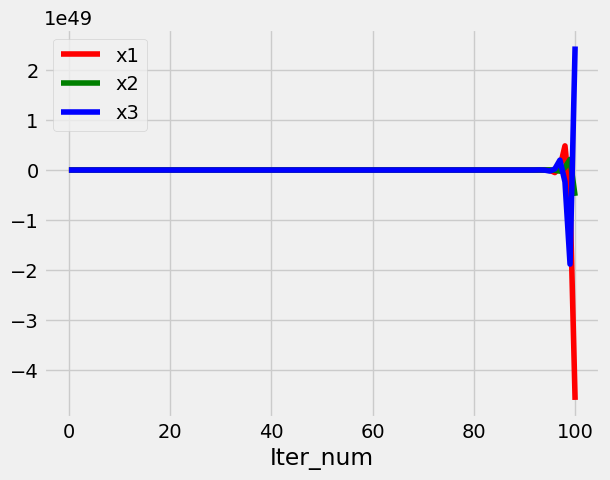

In [5]:
# plot state_trajectory
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

t = np.arange(iter_number+1)
ax.plot(t, state_traj[0,t], 'r', label="x1")
ax.plot(t, state_traj[1,t], 'g', label="x2")
ax.plot(t, state_traj[2,t], 'b', label="x3")

ax.set_xlabel("Iter_num")
ax.legend()  

#### **Problem 1:** 
Please use parital pivoting method to rearrange the pivot position. Afterward, using either Jacobi or G-S iterative the slove the results.




<!--NAVIGATION-->
< [4.3 Systems of Linear Equations](Tien_chapter14.03-Systems-of-Linear-Equations.ipynb) | [Contents](Tien_chapter14.04-Solutions-to-Systems-of-Linear-Equations.ipynb) | [4.5 Solve Systems of Linear Equations in Python](Tien_chapter14.05-Solve-Systems-of-Linear-Equations-in-Python.ipynb) >